In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import f_classif

In [2]:
# Depression scores from questionnaire of 2005-2018
files = ["DPQ_D.XPT", "DPQ_E.XPT", "DPQ_F.XPT", "DPQ_G.XPT", "DPQ_H.XPT", "DPQ_I.XPT", "DPQ_J.XPT"]

columns = ["DPQ0" + str(i) for i in range(10, 100, 10)]  # DPQ010 to DPQ090
columns.insert(0,'SEQN')  # add SEQN column
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/questionnaire/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)

# combine all dataframes
combined_df = pd.concat(dfs)
combined_df = combined_df[(combined_df != 7) & (combined_df != 9)].dropna()
combined_df = np.round(combined_df, 0).astype('int64')
combined_df['score'] = combined_df.sum(axis=1) - combined_df['SEQN']
combined_df = combined_df[['SEQN', 'score']]

In [3]:
# complete blood count
files = ["CBC_D.XPT", "CBC_E.XPT", "CBC_F.XPT", "CBC_G.XPT", "CBC_H.XPT", "CBC_I.XPT", "CBC_J.XPT"]
columns = ["SEQN","LBXWBCSI","LBXLYPCT","LBXMOPCT", "LBXNEPCT", "LBXEOPCT", "LBXBAPCT", "LBXRBCSI", "LBXHGB", "LBXMCVSI", "LBXRDW", "LBXPLTSI","LBXMPSI"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/CBC/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
CBC_df = pd.concat(dfs)
CBC_df = CBC_df.dropna()
# convert SEQN to int
CBC_df['SEQN'] = CBC_df['SEQN'].astype('int64')
CBC_df.rename(columns={'LBXWBCSI': 'WBC count', 'LBXLYPCT': 'Lymphocyte %', 'LBXMOPCT': 'Monocyte %', 'LBXNEPCT': 'Segmented neutrophils %',
                       'LBXEOPCT': 'Eosinophil %', 'LBXBAPCT': 'Basophil %', 'LBXRBCSI': 'RBC count', 'LBXHGB': 'Hemoglobin', 'LBXMCVSI': 'Mean cell vol','LBXRDW': 'RBC dist width','LBXPLTSI': 'Platelet count','LBXMPSI': 'Mean platelet vol'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, CBC_df, on='SEQN')

In [4]:
# demographics
files = ["DEMO_D.XPT", "DEMO_E.XPT", "DEMO_F.XPT", "DEMO_G.XPT", "DEMO_H.XPT", "DEMO_I.XPT", "DEMO_J.XPT"]
columns = ["SEQN","RIAGENDR", "RIDAGEYR", "DMDEDUC2"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/demo/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
demo_df = pd.concat(dfs)
demo_df = demo_df.dropna()
demo_df = demo_df[(demo_df != 7) & (demo_df != 9)].dropna()
demo_df = np.round(demo_df, 0).astype('int64')
demo_df['male'] = (demo_df['RIAGENDR'] == 1)*1
demo_df['female'] = (demo_df['RIAGENDR'] == 2)*1
demo_df = demo_df.drop(columns=['RIAGENDR'])
demo_df.rename(columns={'RIDAGEYR': 'age', 'DMDEDUC2': 'education'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, demo_df, on='SEQN')

In [5]:
# sleep 2005-2014
files = ["SLQ_D.XPT", "SLQ_E.XPT", "SLQ_F.XPT", "SLQ_G.XPT", "SLQ_H.XPT"]
columns = ['SEQN', 'SLD010H']
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/sleep/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
# 2015-2016
df = pd.read_sas('data/sleep/' + 'SLQ_I.XPT',format='xport',encoding='utf-8')  # read the file
df = df[["SEQN", 'SLD012']] # extract the required columns
df.rename(columns={'SLD012': 'SLD010H'}, inplace=True)
dfs.append(df)

df = pd.read_sas('data/sleep/' + 'SLQ_J.XPT',format='xport',encoding='utf-8')  # read the file
df = df[["SEQN", 'SLD012']] # extract the required columns
df.rename(columns={'SLD012': 'SLD010H'}, inplace=True)
dfs.append(df)

sleep_df = pd.concat(dfs)
sleep_df = sleep_df[(sleep_df != 77) & (sleep_df != 99)].dropna()
sleep_df = np.round(sleep_df, 0).astype('int64')
sleep_df.rename(columns={'SLD010H': 'sleep'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, sleep_df, on='SEQN')

In [6]:
# alcohol
files = ["ALQ_D.XPT", "ALQ_E.XPT", "ALQ_F.XPT", "ALQ_G.XPT", "ALQ_H.XPT", "ALQ_I.XPT", "ALQ_J.XPT"]
columns = ['SEQN', 'ALQ130']
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/alcohol/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)

alcohol_df = pd.concat(dfs)
alcohol_df = alcohol_df[(alcohol_df != 777) & (alcohol_df != 999)].dropna()
alcohol_df = np.round(alcohol_df, 0).astype('int64')
alcohol_df.rename(columns={'ALQ130': 'alcohol'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, alcohol_df, on='SEQN')

In [7]:
# diet
files = ["DBQ_D.XPT", "DBQ_E.XPT", "DBQ_F.XPT", "DBQ_G.XPT", "DBQ_H.XPT", "DBQ_I.XPT", "DBQ_J.XPT"]
columns = ["SEQN", "DBQ700"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/diet/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
diet_df = pd.concat(dfs)
diet_df = diet_df[(diet_df != 7) & (diet_df != 9)].dropna()
diet_df = np.round(diet_df, 0).astype('int64')
# how healthy is diet: 5 is best, 1 is worst
diet_df['DBQ700'] = 6 - diet_df['DBQ700']
diet_df.rename(columns={'DBQ700': 'diet'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, diet_df, on='SEQN')

In [8]:
# physical activity
files = ["PAQ_E.XPT", "PAQ_F.XPT", "PAQ_G.XPT", "PAQ_H.XPT", "PAQ_I.XPT", "PAQ_J.XPT"]
columns = ["SEQN","PAQ650", "PAQ665"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/physical_activity/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
# 2005-2006
df = pd.read_sas('data/physical_activity/' + 'PAQ_D.XPT',format='xport',encoding='utf-8')  # read the file
df = df[["SEQN","PAD200", "PAD320"]] # extract the required columns
# change the value 3 to 2
df['PAD200'] = df['PAD200'].replace(3, 2)
df['PAD320'] = df['PAD320'].replace(3, 2)
df.rename(columns={'PAD200': 'PAQ650', 'PAD320': 'PAQ665'}, inplace=True)
dfs.append(df)

    
physical_activity_df = pd.concat(dfs)
physical_activity_df = physical_activity_df[(physical_activity_df != 7) & (physical_activity_df != 9)].dropna()
physical_activity_df = np.round(physical_activity_df, 0).astype('int64')
physical_activity_df.replace(2, 0, inplace=True)
physical_activity_df.rename(columns={'PAQ650': 'vigorous activity', 'PAQ665': 'moderate activity'}, inplace=True)
# sort by SEQN in ascending order
physical_activity_df.sort_values(by=['SEQN'], inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, physical_activity_df, on='SEQN')



In [9]:
# smoking
files = ["SMQ_D.XPT","SMQ_E.XPT", "SMQ_F.XPT", "SMQ_G.XPT", "SMQ_H.XPT", "SMQ_I.XPT", "SMQ_J.XPT"]
columns = ["SEQN", "SMQ040"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/smoking/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)

smoking_df = pd.concat(dfs)
smoking_df = smoking_df[(smoking_df != 7) & (smoking_df != 9)].dropna()
smoking_df = np.round(smoking_df, 0).astype('int64')
smoking_df.rename(columns={'SMQ040': 'smoking'}, inplace=True)
# change  3 to 0, 2 to 1, and 1 to 2
smoking_df['smoking'] = smoking_df['smoking'].replace(3, 0)
smoking_df['smoking'] = smoking_df['smoking'].replace(2, 3)
smoking_df['smoking'] = smoking_df['smoking'].replace(1, 2) #temp
smoking_df['smoking'] = smoking_df['smoking'].replace(3, 1)
# merge with combined_df
combined_df = pd.merge(combined_df, smoking_df, on='SEQN')

In [10]:
# Blood pressure
files = ["BPX_D.XPT", "BPX_E.XPT", "BPX_F.XPT", "BPX_G.XPT", "BPX_H.XPT", "BPX_I.XPT", "BPX_J.XPT"]
columns = ["SEQN", "BPXSY1", "BPXDI1"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/BP/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
blood_pressure_df = pd.concat(dfs)
blood_pressure_df = blood_pressure_df.dropna()
blood_pressure_df = np.round(blood_pressure_df, 0).astype('int64')
blood_pressure_df.rename(columns={'BPXSY1': 'SBP', 'BPXDI1': 'DBP'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, blood_pressure_df, on='SEQN')

In [11]:
# weight [kG]
files = ["BMX_D.XPT", "BMX_E.XPT", "BMX_F.XPT", "BMX_G.XPT", "BMX_H.XPT", "BMX_I.XPT", "BMX_J.XPT"]
columns = ["SEQN", "BMXWT"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/weight/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
weight_df = pd.concat(dfs)
weight_df = weight_df.dropna()

weight_df.rename(columns={'BMXWT': 'weight'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, weight_df, on='SEQN')


In [12]:
# diabetes
files = ["DIQ_D.XPT", "DIQ_E.XPT", "DIQ_F.XPT", "DIQ_G.XPT", "DIQ_H.XPT", "DIQ_I.XPT", "DIQ_J.XPT"]
columns = ["SEQN", "DIQ010"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/diabetes/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
diabetes_df = pd.concat(dfs)
diabetes_df = diabetes_df.dropna()
diabetes_df = np.round(diabetes_df, 0).astype('int64')
diabetes_df = diabetes_df[(diabetes_df != 7) & (diabetes_df != 9)].dropna()
diabetes_df.rename(columns={'DIQ010': 'diabetes'}, inplace=True)
# replace 1 with 2, 2 with 0 and 3 with 1
diabetes_df['diabetes'] = diabetes_df['diabetes'].replace({1: 2, 2: 0, 3: 1})
# merge with combined_df
combined_df = pd.merge(combined_df, diabetes_df, on='SEQN')


In [13]:
# cholesterol [mg/dL]
files = ['HDL_D.XPT', 'HDL_E.XPT', 'HDL_F.XPT', 'HDL_G.XPT', 'HDL_H.XPT', 'HDL_I.XPT', 'HDL_J.XPT']
columns = ["SEQN", "LBDHDD"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/cholesterol_HDL/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)

cholesterol_df = pd.concat(dfs)
cholesterol_df = cholesterol_df.dropna().astype('int64')
cholesterol_df.rename(columns={'LBDHDD': 'cholesterol_HDL'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, cholesterol_df, on='SEQN')



In [14]:
# cholesterol LDL and triglycerides [mg/dL]
files = ['TRIGLY_D.XPT', 'TRIGLY_E.XPT', 'TRIGLY_F.XPT', 'TRIGLY_G.XPT', 'TRIGLY_H.XPT', 'TRIGLY_I.XPT', 'TRIGLY_J.XPT']
columns = ["SEQN", "LBXTR", "LBDLDL"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/cholesterol_LDL/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
cholesterol_LDL_triglycerides_df = pd.concat(dfs)
cholesterol_LDL_triglycerides_df = cholesterol_LDL_triglycerides_df.dropna().astype('int64')
cholesterol_LDL_triglycerides_df.rename(columns={'LBXTR': 'triglycerides', 'LBDLDL': 'cholesterol_LDL'}, inplace=True)
# merge with combined_df
combined_df = pd.merge(combined_df, cholesterol_LDL_triglycerides_df, on='SEQN')

In [15]:
# health condition
files = ['HSQ_D.XPT','HSQ_E.XPT','HSQ_F.XPT','HSQ_G.XPT','HSQ_H.XPT','HSQ_I.XPT','HSQ_J.XPT']
columns = ["SEQN", "HSD010"]
dfs = []  # list to store dataframes

for file in  files:
    df = pd.read_sas('data/health condition/' + file,format='xport',encoding='utf-8')  # read the file
    df = df[columns] # extract the required columns
    dfs.append(df)
    
health_condition_df = pd.concat(dfs)
health_condition_df = health_condition_df.dropna()
health_condition_df = np.round(health_condition_df, 0).astype('int64')
health_condition_df = health_condition_df[(health_condition_df != 7) & (health_condition_df != 9)].dropna()
health_condition_df.rename(columns={'HSD010': 'health_condition'}, inplace=True)
health_condition_df['health_condition'] = (6 - health_condition_df['health_condition']).astype('int64')
# merge with combined_df
combined_df = pd.merge(combined_df, health_condition_df, on='SEQN')


In [16]:
combined_df

,SEQN,score,WBC count,Lymphocyte %,Monocyte %,Segmented neutrophils %,Eosinophil %,Basophil %,RBC count,Hemoglobin,...,moderate activity,smoking,SBP,DBP,weight,diabetes,cholesterol_HDL,triglycerides,cholesterol_LDL,health_condition
0,31150,1,6.5,18.8,9.6,68.7,2.4,0.4,4.48,14.4,...,1,0,144,74,85.0,0.0,81,50,90,4
1,31158,2,8.0,25.6,5.9,62.2,5.1,1.2,4.73,15.9,...,1,2,154,74,69.2,0.0,71,88,110,4
2,31167,3,9.5,27.3,7.6,62.3,2.3,0.4,5.30,16.3,...,1,2,144,80,129.9,0.0,37,325,100,3
3,31195,0,8.9,18.3,7.4,72.3,1.9,0.1,4.40,13.5,...,0,0,118,64,62.7,0.0,43,85,109,4
4,31228,0,5.9,35.7,6.1,55.0,2.3,1.0,5.70,16.5,...,0,0,122,62,61.5,0.0,64,66,117,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,102895,3,6.6,35.8,6.6,48.5,8.2,1.0,5.38,14.4,...,0,2,142,92,117.8,2.0,40,76,112,3
4700,102918,0,6.7,33.2,9.3,53.7,3.2,0.8,4.82,15.5,...,0,2,98,72,64.3,0.0,49,52,88,5
4701,102920,7,6.1,31.9,8.1,55.0,4.2,0.8,4.79,14.6,...,0,0,166,94,73.0,0.0,66,101,137,3
4702,102947,1,3.6,38.0,18.6,42.5,0.3,0.7,4.93,10.7,...,1,0,160,82,73.2,0.0,70,35,66,3


In [17]:
# create depression column with 1 if score is equal or greater than 10 and 0 otherwise
combined_df['depression'] = np.where(combined_df['score'] >= 10, 1, 0)
# drop score
combined_df.drop(columns=['SEQN','score'], inplace=True)


In [18]:
# save to csv
combined_df.to_csv('data/combined.csv', index=False)

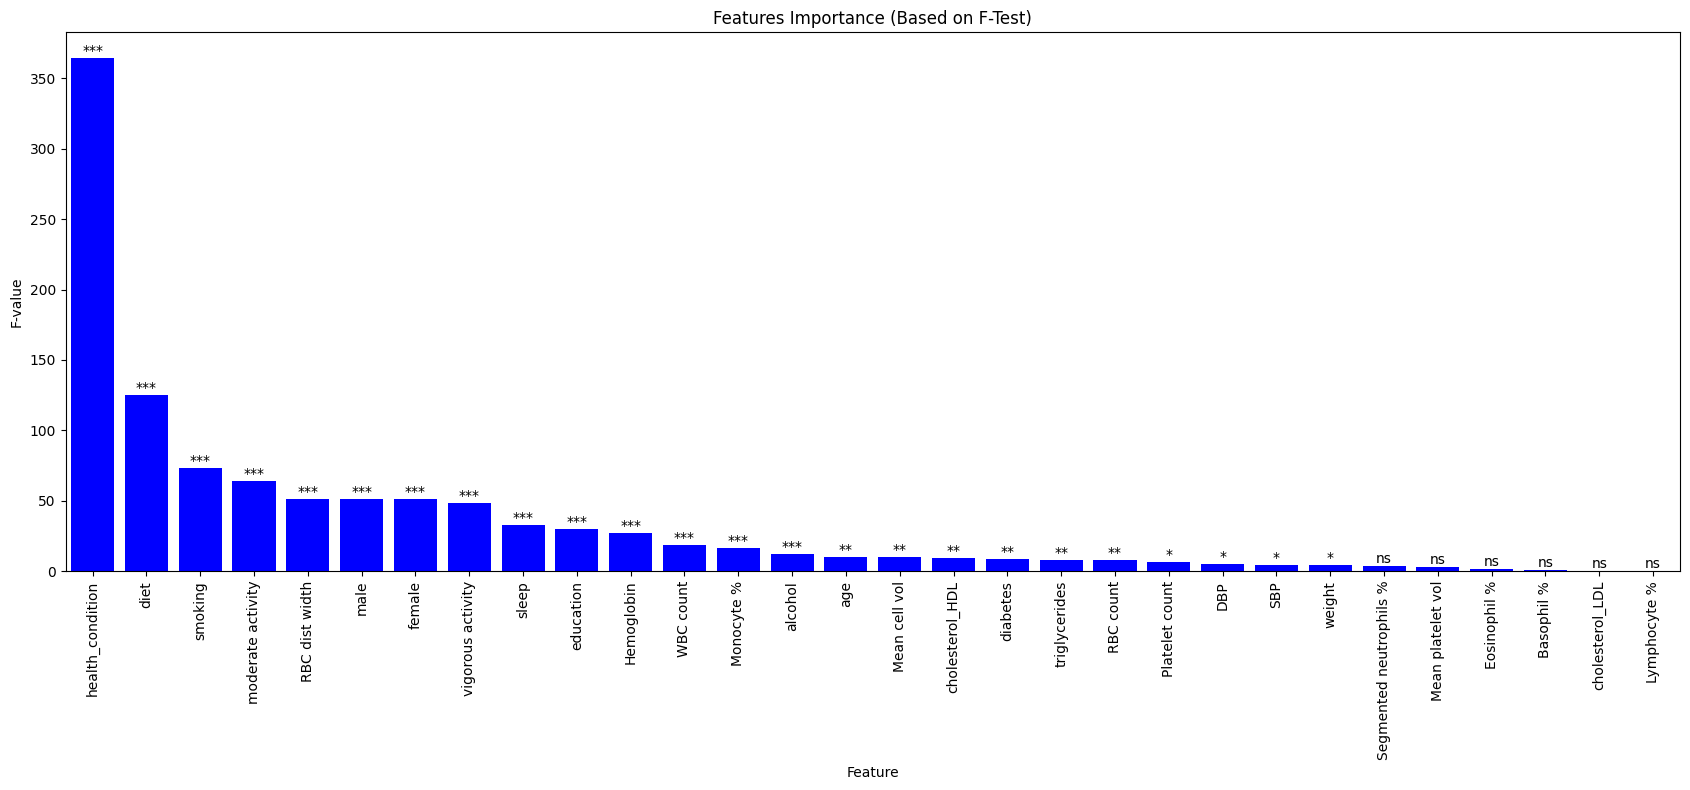

In [19]:
# feature importance
X = combined_df.drop(columns=['depression'])
y = combined_df['depression']

f_values, p_values = f_classif(X, y)


f_test = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

f_test = f_test.sort_values(by='F-value', ascending=False)


# Significance notation
def significance_notation(p):
    if p > 0.05:
        return 'ns'
    elif 0.05 >= p > 0.01:
        return '*'
    elif 0.01 >= p > 0.001:
        return '**'
    elif p <= 0.001:
        return '***'


plt.figure(figsize=(17, 8))
bars = plt.bar(f_test['Feature'], f_test['F-value'], color='blue')
for bar, p_value in zip(bars, f_test['p-value']):
    height = bar.get_height()
    notation = significance_notation(p_value)
    plt.text(bar.get_x() + bar.get_width() / 2, height, notation, ha='center', va='bottom')
plt.title('Features Importance (Based on F-Test)')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=90, ha='center')
plt.xlim(-0.5, len(f_test['Feature']) - 0.5)
plt.tight_layout()
plt.show()